### Here I'm planning to build a class for physics phenomena.

Mathematics require a small dose, not of genius, but of an imaginative freedom which,

in a larger dose, would be insanity.

In [2]:
import numpy as np
from math import floor, sqrt
import matplotlib.pyplot as plt
import scienceplots


In [3]:
"""
Universal law of gravitation
F = G * (m1 * m2) / r^2
- has to be defined on all objects
"""

'\nUniversal law of gravitation\nF = G * (m1 * m2) / r^2\n- has to be defined on all objects\n'

In [4]:
data = {
    'earth_sun_distance'  : 148.1*10**9, # m
    'earth_sun_perihelion': 147.1*10**9, # m
    'earth_sun_aphelion'  : 152.1*10**9, # m
    'gravitational_constant': 6.6743*10**-11, # m^3 kg^-1 s^-2
    'earth_mass'          : 5.972*10**24, # kg
    'sun_mass'            : 1.989*10**30, # kg
}
data

{'earth_sun_distance': 148100000000.0,
 'earth_sun_perihelion': 147100000000.0,
 'earth_sun_aphelion': 152100000000.0,
 'gravitational_constant': 6.6743e-11,
 'earth_mass': 5.972e+24,
 'sun_mass': 1.9890000000000002e+30}

Hi, thanks for your question. Of course, you can do it using the superposition principle. For example, you can add Jupiter to the system.

 You need to know the position and velocity of the Earth and Jupiter at a given point in their orbits. Then you can calculate the forces 
 
 exerted by the Sun and Jupiter over the Earth and same thing for Jupiter with the forces by the Sun and the Earth on it. Then add the 
 
 forces as vectors and apply the same methodology. You have to calculate both trajectories for the Earth and Jupiter simultaneously. 
 
 Similar process if you want to add more planets or other objects to the system.

In [5]:
M   = 1.989e30 # kg
m   = 5.972e24 # kg
G   = 6.6743e-11 # m^3 kg^-1 s^-2

# initial position at aphelion
x0  = 152.1e9 # m
y0  = 0

# initial velocity at aphelion
vx0 = 0
vy0 = 29.29e3 # m/s

# time intervals in seconds
Step = Delta_t = 0.2*3600
Min = 0
Max = 365.24*24*3600
Npoints = floor((Max-Min)/Step)
print("Npoints = ", Npoints)

# data array
t = np.arange(Min, Max, Step, dtype=np.float64)
x = np.arange(Min, Max, Step, dtype=np.float64)
y = np.arange(Min, Max, Step, dtype=np.float64)
vx = np.arange(Min, Max, Step, dtype=np.float64)
vy = np.arange(Min, Max, Step, dtype=np.float64)


def Delta_vx(x, y):
    return -G*M*x*Delta_t/(x**2 + y**2)**(3/2)

def Delta_vy(x, y):
    return -G*M*y*Delta_t/(x**2 + y**2)**(3/2)

# initial point
x[0] = x0
y[0] = y0
vx[0] = vx0
vy[0] = vy0

# first iteration
vx[1] = vx[0] + Delta_vx(x[0], y[0])
vy[1] = vy[0] + Delta_vy(x[0], y[0])
x[1] = x[0] + vx[1]*Delta_t
y[1] = y[0] + vy[1]*Delta_t

# next iterations

for i in range(2, Npoints+1):
    vx[i] = vx[i-1] + Delta_vx(x[i-1], y[i-1])
    vy[i] = vy[i-1] + Delta_vy(x[i-1], y[i-1])
    x[i] = x[i-1] + 0.5*(vx[i]+vx[i-1])*Delta_t
    y[i] = y[i-1] + 0.5*(vy[i]+vy[i-1])*Delta_t

Npoints =  43828


In [6]:
for i in x:
    print(i)

152100000000.0
152099997025.2733
152099992563.18323
152099985126.3665
152099974714.82315
152099961328.5534
152099944967.55746
152099925631.8356
152099903321.38815
152099878036.2155
152099849776.3181
152099818541.69647
152099784332.3511
152099747148.28262
152099706989.49173
152099663855.9791
152099617747.7455
152099568664.7918
152099516607.11887
152099461574.72763
152099403567.6191
152099342585.7943
152099278629.25436
152099211698.00043
152099141792.03372
152099068911.3555
152098993055.9671
152098914225.8699
152098832421.06534
152098747641.55487
152098659887.3401
152098569158.42258
152098475454.804
152098378776.48602
152098279123.47046
152098176495.75912
152098070893.35388
152097962316.25668
152097850764.4695
152097736237.9944
152097618736.83344
152097498260.98877
152097374810.46265
152097248385.2573
152097118985.37506
152096986610.8183
152096851261.58945
152096712937.69098
152096571639.12543
152096427365.89542
152096280118.00357
152096129895.4526
152095976698.24527
152095820526.3844
15

In [472]:
class Node:
    
    def __init__(self, name, mass, x, y, vx, vy):
        self.name = name
        self.mass = mass
        
        # initial position and velocity at aphelion
        self.x = x
        self.y = y
        self.vx = vx
        self.vy = vy

        self.prev = None
        self.next = None

class LinkedList:
    def __init__(self):
        self.head = None
        self.tail = None
        self.length = 0

    def append(self, name, mass, x, y, vx, vy):
        new_node = Node(name, mass, x, y, vx, vy)
        if self.length == 0:
            self.head = self.tail = new_node
        else:
            self.tail.next = new_node
            new_node.prev = self.tail
            self.tail = new_node
        self.length += 1

    def _give_node_data(self, name, key):
        if isinstance(key, int):
            index = 0
            current = self.head
            while current:
                if index == key:
                    if key == 'data_and_mass':
                        return current.x, current.y, current.vx, current.vy, current.mass
                    elif key == 'data':
                        return current.x, current.y, current.vx, current.vy
                    elif key == 'mass':
                        return current.mass
                index += 1
                current = current.next
            raise IndexError("Index out of range")
        else:
            current = self.head
            while current:
                if current.name == name:
                    if key == 'data_and_mass':
                        return current.x, current.y, current.vx, current.vy, current.mass
                    elif key == 'data':
                        return current.x, current.y, current.vx, current.vy
                    elif key == 'mass':
                        return current.mass
                current = current.next
            raise KeyError(f"Name '{name}' not found")

    def __iter__(self):
        self._iter_node = self.head
        return self
    
    def __next__(self):
        if self._iter_node is None:
            raise StopIteration
        ret = self._iter_node.name

        self._iter_node = self._iter_node.next
        return ret

    def __len__(self):
        return self.length
    
    def __str__(self):
        return str([value for value in self])
    
    def __getitem__(self, key):

        current = self.head
        for _ in range(key):
            if current is None:
                raise IndexError("Index out of range")
            current = current.next
        if current is None:
            raise IndexError("Index out of range")
        return current.array

### Math

For first iteration:

$$ x_1 = x_0 + v_{xi} * \Delta t $$
$$ y_1 = y_0 + v_{yi} * \Delta t $$
$$ v_{x1} = v_{x0} + \Delta v_{x0} $$
$$ v_{y1} = v_{y0} + \Delta v_{y0} $$

Add a Star -> Planet -> Moon relationship


or in other words Parent -> Child relationship

In [493]:
class Planet(LinkedList):
    # Constants
    G   = 6.6743e-11 # m^3 kg^-1 s^-2
    delta_t = float(0.2*3600)
    min = float(0*24*3600)
    max = float(365.24*24*3600)


    def universal_gravitation_law_to_sun(self):
        npoints = floor((self.max-self.min)/self.delta_t)
        M = 1.989e30 # kg
        T = self.delta_t
        Txy = T/2
        GMT = -self.G*M*T
        delta_v = GMT/(x[0]**2 + y[0]**2)**(3/2)

        for node in self:

            array = self._give_node_data(node, 'array')

            for i in range(1, npoints+1):
                delta_v = GMT/(x[i-1]**2 + y[i-1]**2)**(3/2)
                array[0:,i] = x[i-1] + (vx[i]+vx[i-1])*Txy
                array[1:,i] = y[i-1] + (vy[i]+vy[i-1])*Txy
                array[2:,i] = vx[i-1] + x[i-1]*delta_v
                array[3:,i] = vy[i-1] + y[i-1]*delta_v


    def universal_gravitation_law(self):
        npoints = floor((self.max-self.min)/self.delta_t)
        T = self.delta_t
        Txy = T/2
        GT = -self.G*T

        MULTIPLIER = 4
        n = MULTIPLIER

        """
        Do something like:
        for i in self:
            _give_node_data(i, 'mass')

        or even better implement for code below __getitem__ method
        and reach to it with iter1 and iter2:

        for i in range(2, npoints + 1):
            for iter1 in range(0, (len(self)-1)):
                print(f"iter_one: {iter_one}")
                for iter2 in range(n, (len(self))):
                
        Add reversed code to implement math for second body
        """
        for i in range(2, npoints + 1):
            for iter1 in range(0, (len(self)-1)):
                for iter2 in range(n, (len(self))):
                    m1 = self[iter1]
                    m2 = self[iter2]
                    
                    iter_one = iter1*4
                    iter_two = iter2*4
                    array = self.arangematrix()
                    x1  = array[0, 0 + iter_one]
                    y1  = array[0, 1 + iter_one]
                    v1x = array[0, 2 + iter_one]
                    v1y = array[0, 3 + iter_one]

                    x2  = array[0, 0 + iter_two]
                    y2  = array[0, 1 + iter_two]
                    v2x = array[0, 2 + iter_two]
                    v2y = array[0, 3 + iter_two]

                
                
                    commondivisor = ((x1[i - 1] - x2[i - 1]) ** 2 + (y1[i - 1] - y2[i - 1]) ** 2)

                    delta_vtest1 = GT * m2 / (commondivisor * sqrt(x1[i - 1]**2 + y1[i - 1]**2))
                    delta_vtest2 = GT * m1 / (commondivisor * sqrt(x2[i - 1]**2 + y2[i - 1]**2))

                    v1x[i] = v1x[i - 1] + x1[i - 1] * delta_vtest1
                    v1y[i] = v1y[i - 1] + y1[i - 1] * delta_vtest1
                    x1[i] = x1[i - 1] + (v1x[i] + v1x[i - 1]) * Txy
                    y1[i] = y1[i - 1] + (v1y[i] + v1y[i - 1]) * Txy
                    v2x[i] = v2x[i - 1] + x2[i - 1] * delta_vtest2
                    v2y[i] = v2y[i - 1] + y2[i - 1] * delta_vtest2
                    x2[i] = x2[i - 1] + (v2x[i] + v2x[i - 1]) * Txy
                    y2[i] = y2[i - 1] + (v2y[i] + v2y[i - 1]) * Txy



            n += 1


    def test(self):
        MULTIPLIER = 4
        n = MULTIPLIER
        for iter_one in range(0, (len(self)-1)*MULTIPLIER, MULTIPLIER):
            print(f"iter_one: {iter_one}")
            for iter_two in range(n, (len(self))*MULTIPLIER, MULTIPLIER):
                print(f"iter_two: {iter_two}")


            n += MULTIPLIER

                
            
            
        

    def arangematrix(self):
        NUM_COLUMNS = 4

        array = np.arange(self.min, self.max, self.delta_t, dtype=np.float64)
        repeated_array = np.repeat(array, (NUM_COLUMNS*len(self)))
        final = np.reshape(repeated_array, (len(array), NUM_COLUMNS*len(self)))
        
        i = 0
        for node in self:
            print(f"This is node: {node}")
            x, y, vx, vy = self._give_node_data(node, 'data')
            final[0, i] = x
            final[0, i + 1] = y
            final[0, i + 2] = vx
            final[0, i + 3] = vy

            i += NUM_COLUMNS
        
        return final


    def define_time_interval(self, delta_t=0.2, min=0, max=365.24) -> float:
        """
        This method is used if you want to alter the time interval for the simulation.

        Values for min and max are in days.
        Values for delta_t are in hours.

        min: start time
        max: end time - base value provided represents a year.
        delta_t: time step - base value provided represents 0.2 hours.
        """
        self.delta_t = float(delta_t*3600)
        self.min = float(min*24*3600)
        self.max = float(max*24*3600)

    def get_speed(self, name):
        array = self._give_node_data(name, 'array')
        return np.sqrt(array[2,:]**2 + array[3,:]**2)
    
    def get_timestep(self):
        return np.arange(self.min, self.max, self.delta_t, dtype=np.float64)

In [494]:
solar_system = Planet()
solar_system.define_time_interval()
solar_system.append(
    name='Earth',
    mass=5.972e24,
    x=152.1e9,
    y=0,
    vx=0,
    vy=29.29e3
)
solar_system.append(
    name='Sun',
    mass=1.989e30,
    x=0,
    y=0,
    vx=0,
    vy=0
)
solar_system.append(
    name='Mars',
    mass=6.39e23,
    x=249.2e9,
    y=0,
    vx=0,
    vy=24.07e3
)
solar_system.append(
    name='Venus',
    mass=4.867e24,
    x=108.2e9,
    y=0,
    vx=0,
    vy=35.02e3
)
len(solar_system)

4

In [495]:
solar_system.test()

iter_one: 0
iter_two: 4
iter_two: 8
iter_two: 12
iter_one: 4
iter_two: 8
iter_two: 12
iter_one: 8
iter_two: 12


In [496]:
array = solar_system.arangematrix()
array[0]

This is node: Earth
This is node: Sun
This is node: Mars
This is node: Venus


array([1.521e+11, 0.000e+00, 0.000e+00, 2.929e+04, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 2.492e+11, 0.000e+00, 0.000e+00, 2.407e+04,
       1.082e+11, 0.000e+00, 0.000e+00, 3.502e+04])

In [497]:
solar_system.universal_gravitation_law()

UnboundLocalError: cannot access local variable 'array' where it is not associated with a value

In [499]:
array = solar_system
array[0]

5.972e+24

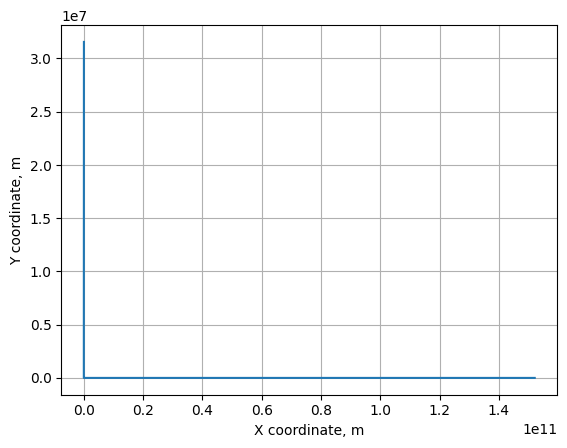

In [175]:
plt.figure(1)
plt.plot(array2[0], array2[1])
plt.grid(True)
plt.xlabel('X coordinate, m')
plt.ylabel('Y coordinate, m')
# plt.xlim(-1.6*10**11, 1.6*10**11)
plt.show()

In [177]:
array1 = solar_system['Sun']

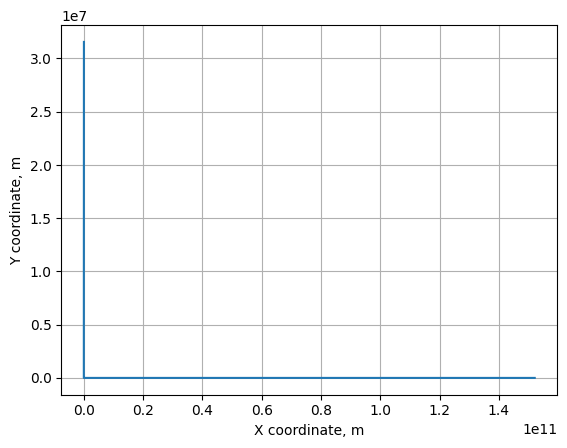

In [178]:
plt.figure(1)
plt.plot(array2[0], array2[1])
plt.grid(True)
plt.xlabel('X coordinate, m')
plt.ylabel('Y coordinate, m')
# plt.xlim(-1.6*10**11, 1.6*10**11)
plt.show()

Part 2

In [575]:
G = 6.6743e-11 # m^3 kg^-1 s^-2
m1 = 5.972e24 # kg
m2 = 7.3476e22 # kg
rm   = m2/m1
Ra  = 405.7e6 # m - Earth-Moon distance at apogee
x20  = Ra/(1+rm)
y20  = 0
v2x0 = 0
v2y0 = 962
x10 = -Ra*rm/(1+rm)
y10 = 0
v1x0 = 0
v1y0 = -v2y0*rm

Step = Delta_t = 0.1*3600

Min = 0
Max = 27.322*24*3600
Npoints = floor((Max-Min)/Step)
print("Npoints = ", Npoints)

v1x = np.arange(Min, Max, Step, dtype=np.float64)
v1y = np.arange(Min, Max, Step, dtype=np.float64)
v2x = np.arange(Min, Max, Step, dtype=np.float64)
v2y = np.arange(Min, Max, Step, dtype=np.float64)
x1 = np.arange(Min, Max, Step, dtype=np.float64)
y1 = np.arange(Min, Max, Step, dtype=np.float64)
x2 = np.arange(Min, Max, Step, dtype=np.float64)
y2 = np.arange(Min, Max, Step, dtype=np.float64)

GT = -G*Delta_t
GTm1 = GT*m1
GTm2 = GT*m2
Txy = Delta_t/2

v1x[0] = v1x0
v1y[0] = v1y0
v2x[0] = v2x0
v2y[0] = v2y0
x1[0] = x10
y1[0] = y10
x2[0] = x20
y2[0] = y20

for i in range(1, Npoints+1):
    commondivisor =((x1[i-1]-x2[i-1])**2 + (y1[i-1]-y2[i-1])**2)
    delta_vtest1 = GTm2/(commondivisor*sqrt(x1[i-1]**2+y1[i-1]**2))
    delta_vtest2 = GTm1/(commondivisor*sqrt(x2[i-1]**2+y2[i-1]**2))

    v1x[i] = v1x[i-1] + x1[i-1]*delta_vtest1
    v1y[i] = v1y[i-1] + y1[i-1]*delta_vtest1
    v2x[i] = v2x[i-1] + x2[i-1]*delta_vtest2
    v2y[i] = v2y[i-1] + y2[i-1]*delta_vtest2
    x1[i] = x1[i-1] + (v1x[i] + v1x[i-1])*Txy
    y1[i] = y1[i-1] + (v1y[i] + v1y[i-1])*Txy
    x2[i] = x2[i-1] + (v2x[i] + v2x[i-1])*Txy
    y2[i] = y2[i-1] + (v2y[i] + v2y[i-1])*Txy

Npoints =  6557


(-6000000.0, 6000000.0)

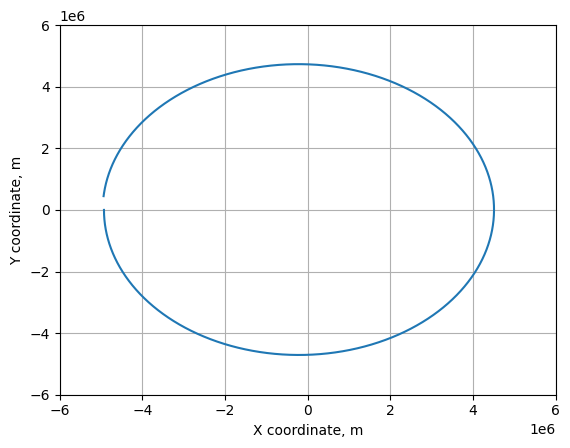

In [576]:
plt.figure(1)
plt.plot(x1, y1)
plt.grid(True)
plt.xlabel('X coordinate, m')
plt.ylabel('Y coordinate, m')
plt.xlim(-6e6, 6e6)
plt.ylim(-6e6, 6e6)

Text(0, 0.5, 'Y coordinate, m')

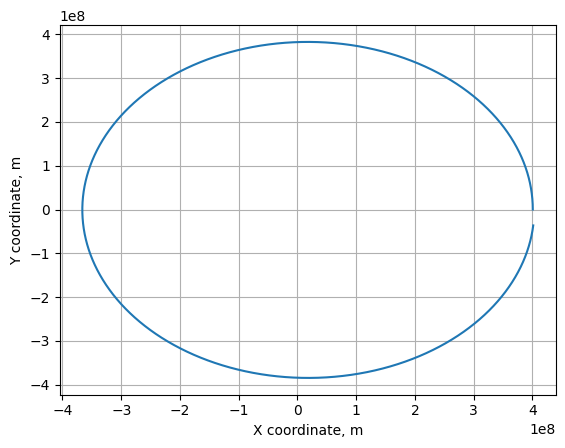

In [556]:
plt.figure(2)
plt.plot(x2, y2)
plt.grid(True)
plt.xlabel('X coordinate, m')
plt.ylabel('Y coordinate, m')

Text(0, 0.5, 'Y coordinate, m')

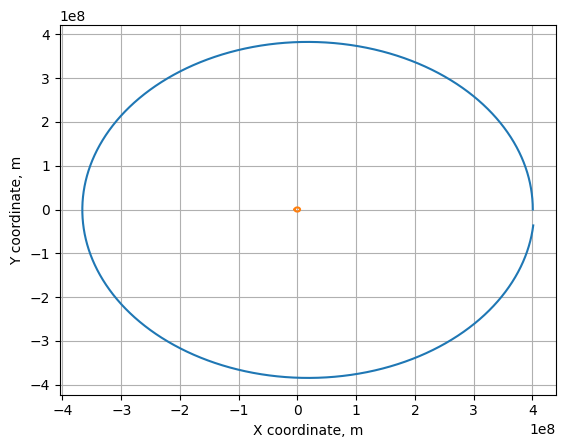

In [518]:
plt.figure(3)
plt.plot(x2, y2)
plt.plot(x1, y1)
plt.grid(True)
plt.xlabel('X coordinate, m')
plt.ylabel('Y coordinate, m')

Text(0, 0.5, 'Y coordinate, m')

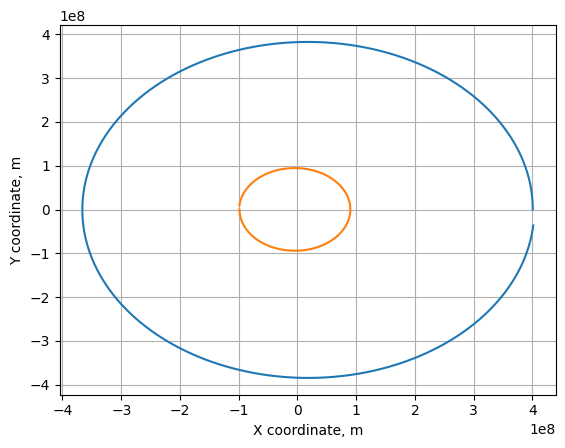

In [519]:
plt.figure(4)
plt.plot(x2, y2)
plt.plot(x1*20, y1*20)
plt.grid(True)
plt.xlabel('X coordinate, m')
plt.ylabel('Y coordinate, m')